In this notebook, we process the Pima Indian dataset in a similar way as we did for Single_Layer_Perceptron notebook. A Multi Layer Perceptron will be designed from scratch and used for classification. The code in this notebook is adapted from an assignment on [Coursera Andrew Ng Deep Learning course](https://www.coursera.org/learn/neural-networks-deep-learning/notebook/lSYZM/building-your-deep-neural-network-step-by-step). 

In [338]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [339]:
#read data as pandas dataframe and examine first 5 rows
diabetes = pd.read_csv('data/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [340]:
#preprocess dataset similarly to notebook for Single Layer Perceptron
diabetes = diabetes[diabetes['Glucose']>25]
diabetes = diabetes[diabetes['BloodPressure']>0]
diabetes = diabetes[diabetes['BMI']>0]
len(diabetes)

724

In [341]:
#split dataset similarly to notebook for Single Layer Perceptron
from sklearn.model_selection import train_test_split
col_names= diabetes.columns.to_list()
X = diabetes[col_names[:-1]]
y = diabetes['Outcome']
X_train_orig,X_test_orig,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [342]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train_orig)
X_train = scaler.transform(X_train_orig)
X_test = scaler.transform(X_test_orig)
y_train = y_train.to_numpy().reshape(1,len(y_train))
y_test = y_test.to_numpy().reshape(1,len(y_test))

In [343]:
X_train = np.transpose(X_train)
X_test = np.transpose(X_test)

In [344]:
def initialize_parameters(n_x, n_h, n_y):
    """
    This function initializes the weight matrices with small positive random numbers, and bias vectors with zeroes.
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    ### END CODE HERE ###
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters 

In [345]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = np.dot(W,A)+b
    cache = (A,W,b)
    assert(Z.shape == (W.shape[0], A.shape[1]))
    return Z, cache
    

In [346]:
def sigmoid(Z):
    """Perform sigmoid activation of input Z. 
    Returns activation A and caches Z"""
    A = 1/(1+np.exp(-Z))
    return A,Z

def relu(Z):
    """Perform relu activation of input Z. 
    Returns activation A and caches Z"""
    A = np.maximum(0,Z)
    return A,Z

In [347]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
    
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)
        
    elif activation == "relu":
        
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
        
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [348]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev,parameters['W'+str(l)], parameters['b'+str(l)],'relu')
        caches.append(cache)
        None
        
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    
    AL, cache = linear_activation_forward(A,parameters['W'+str(L)], parameters['b'+str(L)], 'sigmoid')
    caches.append(cache)
    None
    
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [349]:
def compute_cost(AL, Y):
    """
    Implement the loss/cost function.

    Arguments:
    AL -- probability vector corresponding to label predictions, shape (1, number of examples)
    Y -- true "label" vector, shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    summation = np.sum(Y*np.log(AL) + (1-Y)*np.log(1-AL))
    cost = (-1/m)*summation
    
    
    cost = np.squeeze(cost)      
    assert(cost.shape == ())
    
    return cost

In [350]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    
    dW = 1/m*np.dot(dZ,np.transpose(A_prev))
    db = 1/m*np.sum(dZ, axis=1,keepdims=True)
    dA_prev = np.dot(np.transpose(W),dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [351]:
def sigmoid_backward(dA,activation_cache):
    """Implement backpropagation for sigmoid activation"""
    sigmoid_output,_ = sigmoid(activation_cache)
    sigmoid_grad = sigmoid_output*(1-sigmoid_output)
    dZ = dA*sigmoid_grad
    return dZ

def relu_backward(dA,activation_cache):
    """Implement backpropagation for relu activation"""
    Z = activation_cache
    dZ = np.array(dA, copy=True)
    # When z <= 0, we should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    return dZ
    
    

In [352]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":

        dZ = relu_backward(dA,cache[1])
        dA_prev, dW, db = linear_backward(dZ,cache[0])
        
        
    elif activation == "sigmoid":
        
        dZ = sigmoid_backward(dA,cache[1])
        dA_prev, dW, db = linear_backward(dZ,cache[0])

    
    return dA_prev, dW, db

In [353]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
   
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,current_cache,'sigmoid')

    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
       
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache,'relu')
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
     

    return grads

In [354]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. 
   
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db" + str(l+1)]

    return parameters

In [355]:
def two_layer_model(X_train, Y_train,X_val, Y_val,layers_dims=[8,16,1], learning_rate = 0.015, num_iterations = 5000, print_cost=True):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID on train and validation sets. Use this 
    function for k-fold cross validation.
    
    Arguments:
    X_train -- input train data, of shape (n_x, number of examples)
    Y_train -- true "label" train vector of shape (1, number of examples)
    X_val --   input validation data, of shape (n_x, number of examples)
    Y_val --   true "label" validation vector of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2 obtained by optimization on train set
    cost_train -- list of loss (cost) value with train set for each epoch
    cost_val -- list of loss(cost) value with validation set for each epoch 
    """
    
    np.random.seed(1)
    grads = {}
    costs_train = []
    costs_val = []
    # to keep track of the cost
    m = X_train.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    
    parameters = initialize_parameters(n_x, n_h, n_y)

    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        
        A1, cache1 = linear_activation_forward(X_train,W1,b1,activation = "relu")
        A2, cache2 = linear_activation_forward(A1,W2,b2,activation = "sigmoid")
        
        # Forward propagation for validation set
        
        VA1, v_cache = linear_activation_forward(X_val,W1,b1,activation = "relu")
        VA2, v_cache = linear_activation_forward(VA1,W2,b2,activation = "sigmoid")
        
        # Compute cost - train and val set
        cost_train = compute_cost(A2,Y_train)
        cost_val = compute_cost(VA2,Y_val)
      
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y_train, A2) - np.divide(1 - Y_train, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        
        dA1, dW2, db2 = linear_activation_backward(dA2,cache2,activation = "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1,cache1,activation = "relu")
        
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        
        parameters = update_parameters(parameters,grads,learning_rate)
      

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        
        
        # Print the cost every 100 training example
        if print_cost and i % 250 == 0:
            print("Train loss after iteration {}: {:.2f}".format(i, np.squeeze(cost_train))+ ' Validation loss: {:.2f}'.format(np.squeeze(cost_val)))
        if print_cost and i % 250 == 0:
            costs_train.append(cost_train)
            costs_val.append(cost_val)
       
    # plot the cost

    plt.plot(np.squeeze(costs_train), color = 'b', label = 'Train loss')
    plt.plot(np.squeeze(costs_val), color = 'orange', label = 'Validation loss')
    plt.ylabel('Loss')
    plt.xlabel('iterations (per hundreds)')
    #plt.title("Learning rate =" + str(learning_rate))
    plt.legend(loc='upper center')
    plt.show()
    
    return parameters, costs_train, costs_val

In [356]:
def mlp_fit(X_train,Y_train,layers_dims=[8,16,1], learning_rate = 0.015, num_iterations=5000):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID on train set. Use this 
    function for model fitting on train set.
    
    Arguments:
    X_train -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector, of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2 obtained by optimization on train set
    
    """
    
    np.random.seed(1)
    grads = {}
    
    m = X_train.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):


        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        
        A1, cache1 = linear_activation_forward(X_train,W1,b1,activation = "relu")
        A2, cache2 = linear_activation_forward(A1,W2,b2,activation = "sigmoid")
        
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y_train, A2) - np.divide(1 - Y_train, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        
        dA1, dW2, db2 = linear_activation_backward(dA2,cache2,activation = "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1,cache1,activation = "relu")
        
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        
        parameters = update_parameters(parameters,grads,learning_rate)
      

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
    
    return parameters
    

In [357]:
def predict(X,parameters):
        """Predict outputs using trained model, return predictions as numpy array."""
        predictions = []
        A1 = linear_activation_forward(X,parameters['W1'],parameters['b1'], 'relu')
        A2 = linear_activation_forward(A1[0],parameters['W2'],parameters['b2'], 'sigmoid')
        for i in range(X.shape[1]):
            if A2[0][:,i] > 0.5:
                prediction = 1
            else:
                prediction = 0
            predictions.append(prediction)    
    
        return np.asarray(predictions).reshape(1,len(predictions))

In [358]:
import random
def k_split(dataset, k_folds, random_state):
    """This function splits a dataset array into specified number of k_folds.
    Returns: a list of k_folds numbers of sublists"""
    random.seed(random_state)
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / k_folds)
    for i in range(k_folds):
        fold = list()
        while len(fold) < fold_size:
            index = random.randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

In [359]:
from sklearn.metrics import accuracy_score
def kfold_cross_validation(dataset,k_folds,random_state):
    """This function performs k-fold cross validation of dataset with specified classifier 
    using accuracy as scoring metric.
    Returns: a list of scores obtained, corresponding each k_fold """
    k_folds = k_split(dataset,k_folds,random_state)
    scores=[]
    for i in range(len(k_folds)):
        folds_copy = list(k_folds)
        val_ = np.asarray(folds_copy.pop(i))
        train_ = np.vstack(folds_copy)
        model= two_layer_model(train_[:,:-1].T,train_[:,-1].reshape(1,len(train_)), val_[:,:-1].T,val_[:,-1].reshape(1,len(val_)))
        predictions = predict(val_[:,:-1].T, model[0])
        score = accuracy_score(predictions.flatten(),val_[:,-1])
        scores.append(score)
        
    return scores   


In [360]:
train_set = np.concatenate((X_train,y_train), axis=0)
train_set = np.transpose(train_set)
train_set.shape

(506, 9)

Train loss after iteration 0: 0.69 Validation loss: 0.69
Train loss after iteration 250: 0.66 Validation loss: 0.66
Train loss after iteration 500: 0.65 Validation loss: 0.66
Train loss after iteration 750: 0.64 Validation loss: 0.65
Train loss after iteration 1000: 0.62 Validation loss: 0.63
Train loss after iteration 1250: 0.56 Validation loss: 0.57
Train loss after iteration 1500: 0.49 Validation loss: 0.51
Train loss after iteration 1750: 0.47 Validation loss: 0.49
Train loss after iteration 2000: 0.46 Validation loss: 0.48
Train loss after iteration 2250: 0.46 Validation loss: 0.48
Train loss after iteration 2500: 0.46 Validation loss: 0.47
Train loss after iteration 2750: 0.45 Validation loss: 0.47
Train loss after iteration 3000: 0.45 Validation loss: 0.47
Train loss after iteration 3250: 0.45 Validation loss: 0.47
Train loss after iteration 3500: 0.45 Validation loss: 0.47
Train loss after iteration 3750: 0.44 Validation loss: 0.47
Train loss after iteration 4000: 0.44 Validati

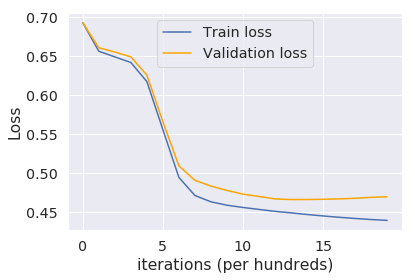

Train loss after iteration 0: 0.69 Validation loss: 0.69
Train loss after iteration 250: 0.65 Validation loss: 0.67
Train loss after iteration 500: 0.65 Validation loss: 0.67
Train loss after iteration 750: 0.64 Validation loss: 0.66
Train loss after iteration 1000: 0.61 Validation loss: 0.64
Train loss after iteration 1250: 0.54 Validation loss: 0.58
Train loss after iteration 1500: 0.48 Validation loss: 0.53
Train loss after iteration 1750: 0.46 Validation loss: 0.51
Train loss after iteration 2000: 0.45 Validation loss: 0.50
Train loss after iteration 2250: 0.45 Validation loss: 0.50
Train loss after iteration 2500: 0.45 Validation loss: 0.50
Train loss after iteration 2750: 0.44 Validation loss: 0.50
Train loss after iteration 3000: 0.44 Validation loss: 0.50
Train loss after iteration 3250: 0.44 Validation loss: 0.50
Train loss after iteration 3500: 0.44 Validation loss: 0.50
Train loss after iteration 3750: 0.44 Validation loss: 0.50
Train loss after iteration 4000: 0.44 Validati

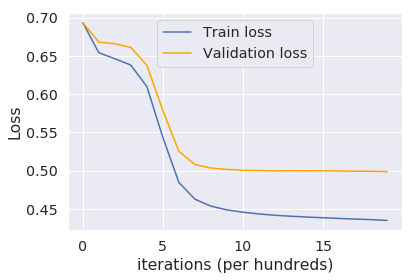

Train loss after iteration 0: 0.69 Validation loss: 0.69
Train loss after iteration 250: 0.66 Validation loss: 0.65
Train loss after iteration 500: 0.65 Validation loss: 0.64
Train loss after iteration 750: 0.65 Validation loss: 0.63
Train loss after iteration 1000: 0.62 Validation loss: 0.61
Train loss after iteration 1250: 0.56 Validation loss: 0.55
Train loss after iteration 1500: 0.49 Validation loss: 0.50
Train loss after iteration 1750: 0.47 Validation loss: 0.48
Train loss after iteration 2000: 0.46 Validation loss: 0.48
Train loss after iteration 2250: 0.45 Validation loss: 0.48
Train loss after iteration 2500: 0.45 Validation loss: 0.48
Train loss after iteration 2750: 0.45 Validation loss: 0.49
Train loss after iteration 3000: 0.45 Validation loss: 0.49
Train loss after iteration 3250: 0.44 Validation loss: 0.49
Train loss after iteration 3500: 0.44 Validation loss: 0.49
Train loss after iteration 3750: 0.44 Validation loss: 0.49
Train loss after iteration 4000: 0.44 Validati

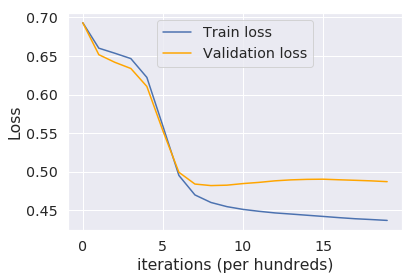

Train loss after iteration 0: 0.69 Validation loss: 0.69
Train loss after iteration 250: 0.66 Validation loss: 0.65
Train loss after iteration 500: 0.66 Validation loss: 0.63
Train loss after iteration 750: 0.65 Validation loss: 0.62
Train loss after iteration 1000: 0.63 Validation loss: 0.60
Train loss after iteration 1250: 0.57 Validation loss: 0.54
Train loss after iteration 1500: 0.51 Validation loss: 0.48
Train loss after iteration 1750: 0.48 Validation loss: 0.46
Train loss after iteration 2000: 0.47 Validation loss: 0.45
Train loss after iteration 2250: 0.46 Validation loss: 0.45
Train loss after iteration 2500: 0.46 Validation loss: 0.45
Train loss after iteration 2750: 0.46 Validation loss: 0.45
Train loss after iteration 3000: 0.45 Validation loss: 0.45
Train loss after iteration 3250: 0.45 Validation loss: 0.45
Train loss after iteration 3500: 0.45 Validation loss: 0.45
Train loss after iteration 3750: 0.45 Validation loss: 0.45
Train loss after iteration 4000: 0.45 Validati

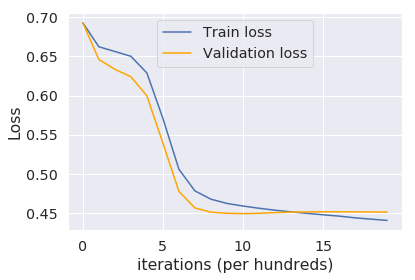

Train loss after iteration 0: 0.69 Validation loss: 0.69
Train loss after iteration 250: 0.66 Validation loss: 0.66
Train loss after iteration 500: 0.65 Validation loss: 0.66
Train loss after iteration 750: 0.64 Validation loss: 0.66
Train loss after iteration 1000: 0.61 Validation loss: 0.63
Train loss after iteration 1250: 0.55 Validation loss: 0.57
Train loss after iteration 1500: 0.49 Validation loss: 0.52
Train loss after iteration 1750: 0.47 Validation loss: 0.50
Train loss after iteration 2000: 0.46 Validation loss: 0.50
Train loss after iteration 2250: 0.46 Validation loss: 0.49
Train loss after iteration 2500: 0.45 Validation loss: 0.49
Train loss after iteration 2750: 0.45 Validation loss: 0.49
Train loss after iteration 3000: 0.45 Validation loss: 0.48
Train loss after iteration 3250: 0.45 Validation loss: 0.48
Train loss after iteration 3500: 0.44 Validation loss: 0.48
Train loss after iteration 3750: 0.44 Validation loss: 0.48
Train loss after iteration 4000: 0.44 Validati

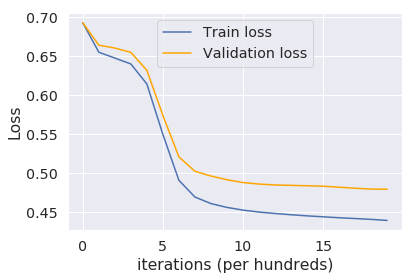

In [361]:
#perform k-fold cross validation of 2-Layer model (MLP) on train set
scores = kfold_cross_validation(train_set,5,42)

In [362]:
scores


[0.7524752475247525,
 0.7524752475247525,
 0.7227722772277227,
 0.801980198019802,
 0.7623762376237624]

In [363]:
mean_score = np.mean(scores)
std_dev = np.std(scores)
print('Multi layer Perceptron - mean accuracy obtained with 5 fold cross validation on train set: {:.2f}'.format(mean_score) + 
      ' with standard deviation : {:.2f}.'.format(std_dev))

Multi layer Perceptron - mean accuracy obtained with 5 fold cross validation on train set: 0.76 with standard deviation : 0.03.


In [364]:
#fit MLP model on entire training set 
mlp = mlp_fit(X_train,y_train)

In [365]:
#predict on test set
test_y_pred = predict(X_test,mlp)
test_score = accuracy_score(y_test.flatten(),test_y_pred.flatten())
print('Multi layer Perceptron - accuracy on test set: {:.2f}'.format(test_score))

Multi layer Perceptron - accuracy on test set: 0.78


Classification report: 

              precision    recall  f1-score   support

Non-Diabetic       0.82      0.87      0.84       149
    Diabetic       0.67      0.59      0.63        69

    accuracy                           0.78       218
   macro avg       0.75      0.73      0.74       218
weighted avg       0.77      0.78      0.78       218


Confusion matrix


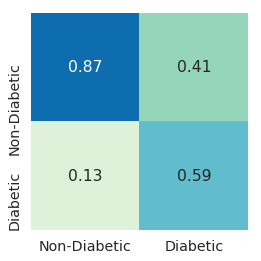

In [366]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print('Classification report: ')
print()
print(classification_report(y_test.flatten(),test_y_pred.flatten(), target_names = ['Non-Diabetic', 'Diabetic']))
print()

print('Confusion matrix')

cmap = sns.color_palette("GnBu")
sns.set(font_scale=1.3) 
cm = confusion_matrix(y_test.flatten(),test_y_pred.flatten(), normalize='true')
sns.heatmap(cm.T, square = True, annot=True, cbar=False,
           xticklabels=['Non-Diabetic', 'Diabetic'],
           yticklabels=['Non-Diabetic', 'Diabetic'], cmap=cmap)


plt.show()